## [作業重點]
了解如何使用 Sklearn 中的 hyper-parameter search 找出最佳的超參數

### 作業
請使用不同的資料集，並使用 hyper-parameter search 的方式，看能不能找出最佳的超參數組合

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

import numpy as np

from matplotlib import pyplot as plt
from pprint import pprint


digits.data.shape: (1797, 64)
digits.data:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
digits.target:
[0 1 2 ... 8 9 8]
digits.images:
[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0

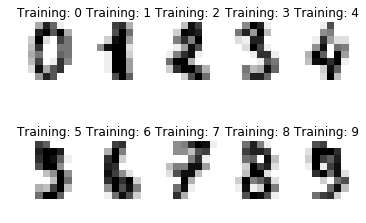

In [2]:
# Load and return the digits dataset
digits = datasets.load_digits()

# print(f"digits:\n{digits}")
print(f"digits.data.shape: {digits.data.shape}")
print(f"digits.data:\n{digits.data}")
print(f"digits.target:\n{digits.target}")
print(f"digits.images:\n{digits.images}")
print(f"digits.DESCR:\n{digits.DESCR}")

images_and_labels = list(zip(digits.images, digits.target))
# print(images_and_labels)
# plot the first 10 samples
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image,                  # the image to be plotted
               cmap=plt.cm.gray_r,     # color map
               interpolation='nearest'
              )
    plt.title(f"Training: {label}")
plt.show()


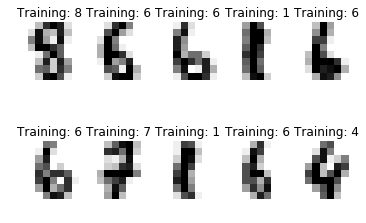

In [3]:
# split into training / test sets
x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, 
                                                                               digits.target, 
                                                                               digits.images, 
                                                                               test_size=0.25, random_state=4)

# plot the first 10 training images
images_and_labels = list(zip(images_train, y_train))
# plot the first 10 samples
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image,                  # the image to be plotted
               cmap=plt.cm.gray_r,     # color map
               interpolation='nearest'
              )
    plt.title(f"Training: {label}")
plt.show()


# Create the random forest classification model

Accuracy: 0.9688888888888889


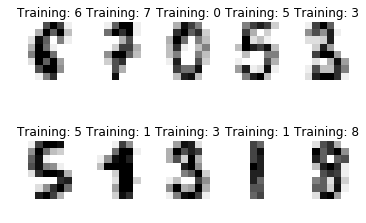

Parameters of Base Model:

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}



In [4]:
# estabish random forest classificaion model
classifier = GradientBoostingClassifier(loss = 'deviance',    # loss function to be optimized
                                        learning_rate = 0.1,
                                        n_estimators = 100,   # The number of boosting stages to perform
                                        criterion = 'friedman_mse'
                                       )

# train model on training set
classifier.fit(x_train, y_train)

# predict test set
y_pred = classifier.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")
# print(f"Feature Importance:\n{classifier.feature_importances_}")


# plot the first 10 test images
images_and_labels = list(zip(images_test, y_test))
# plot the first 10 samples
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image,                  # the image to be plotted
               cmap=plt.cm.gray_r,     # color map
               interpolation='nearest'
              )
    plt.title(f"Training: {label}")
plt.show()

# parameters currently used by base_model
print("Parameters of Base Model:\n")
pprint(classifier.get_params())
print()


# Random Search with Cross Validation

In [5]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt', 'log2', None]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

pprint(random_grid)


{'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [6]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=classifier,
                               param_distributions=random_grid,
                               n_iter = 50,
                               # scoring='neg_mean_absolute_error',
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1,
                               return_train_score=True)

# Fit the random search model
rf_random.fit(x_train, y_train);


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.7min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [7]:
print(f"the best parameters:\n{rf_random.best_params_}\n")


the best parameters:
{'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 25}



In [8]:
print(f"the cross validation result:\n{rf_random.cv_results_}\n")


the cross validation result:
{'mean_fit_time': array([15.54327822,  5.53725489, 12.42823799,  4.85839669,  9.52297672,
        5.07914297,  5.27063179,  5.51664368, 11.80689351,  9.84877396,
        7.50867359,  3.31650265,  8.49305161, 15.83151126,  4.07082804,
        9.19684545, 10.01699456,  9.35209664,  4.09310174,  4.80952589,
       14.21082544,  8.66692177, 11.6798981 , 15.98776094,  5.05155023,
        4.55719956, 15.50670902,  4.1216925 ,  9.739398  ,  6.90760692,
       10.86673101, 14.62904565, 16.35012126,  8.32050157, 11.29923097,
        6.34210269,  8.7290744 ,  4.45446587,  9.68153969,  5.09076961,
        8.00101781,  8.72675006,  7.75932773,  9.06185826,  9.01032925,
       10.59510446, 11.36871155, 10.06651497,  8.52827923,  7.67458057]), 'std_fit_time': array([0.15035771, 0.10433899, 0.00632591, 0.06474028, 0.10129174,
       0.07958219, 0.17674152, 0.06155853, 0.05340061, 0.2646562 ,
       0.31451879, 0.00523571, 0.10029602, 0.12602353, 0.07738456,
       0.09473

In [9]:
print(f"the best score: {rf_random.best_score_}")

the best score: 0.9732739420935412


In [10]:
# re-build teh model using the best parameters
classifier_bestparam = GradientBoostingClassifier(n_estimators = rf_random.best_params_['n_estimators'],
                                                 min_samples_split = rf_random.best_params_['min_samples_split'],
                                                 min_samples_leaf = rf_random.best_params_['min_samples_leaf'],
                                                 max_features = rf_random.best_params_['max_features'],
                                                 max_depth = rf_random.best_params_['max_depth']
                                                 )

# train the model
classifier_bestparam.fit(x_train, y_train)

# predict the test set
y_pred = classifier_bestparam.predict(x_test)

# mean squared error
print(f"mean-squared error: {metrics.mean_squared_error(y_test, y_pred)}\n")

acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")


mean-squared error: 0.3488888888888889

Accuracy: 0.9822222222222222


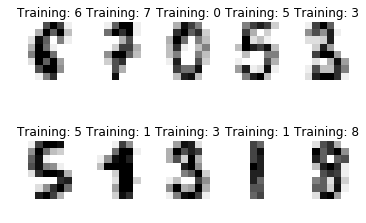

In [11]:
# plot the first 10 test images
images_and_labels = list(zip(images_test, y_test))
# plot the first 10 samples
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image,                  # the image to be plotted
               cmap=plt.cm.gray_r,     # color map
               interpolation='nearest'
              )
    plt.title(f"Training: {label}")
plt.show()
